In [1]:
from sklearn import metrics

In [2]:
C="Cat"
D="Dog"
F="Fox"

In [7]:
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, D,D,D,D,D,D,D,D,D]
y_pred = [C,C,C,C,D,F, F,C,F,F,F,F,F,D,F,F, D,C,F,D,D,D,D,D,D]

print(metrics.confusion_matrix(y_true , y_pred))

print(metrics.classification_report(y_true , y_pred))


[[4 1 1]
 [1 7 1]
 [1 1 8]]
              precision    recall  f1-score   support

         Cat       0.67      0.67      0.67         6
         Dog       0.78      0.78      0.78         9
         Fox       0.80      0.80      0.80        10

    accuracy                           0.76        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.76      0.76      0.76        25



### k nearest neighbour

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv("Classified Data",index_col=0)

In [10]:
df.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [13]:
from sklearn.preprocessing import StandardScaler


In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [16]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

### train test split

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X = scaled_features
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### using knn

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
pred = knn.predict(X_test)

In [26]:
### prediction and evaluations

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [33]:
print(confusion_matrix(y_test,pred))

[[134   8]
 [ 11 147]]


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [36]:
### chosing k value

In [39]:
accuracy_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, df_feat, df['TARGET CLASS'], cv=10)
    accuracy_rate.append(scores.mean())

Text(0.5, 1.0, 'Accurcy Rate vs k value')

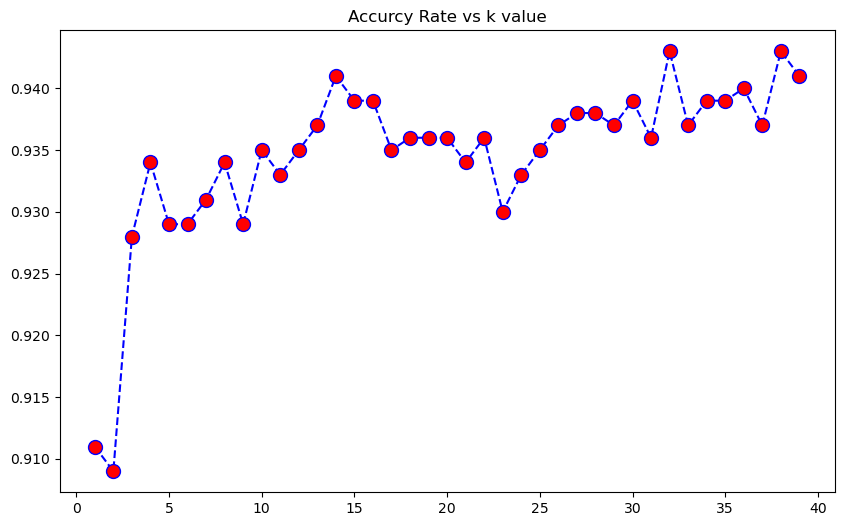

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accurcy Rate vs k value')

In [45]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [46]:
print(confusion_matrix(y_test,pred))

[[135   7]
 [  8 150]]


In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

